# Manual RNN

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\john\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#constant 

In [3]:
num_inputs=2

In [4]:
num_neurons=3

In [5]:
#Placeholders
x0=tf.placeholder(tf.float32,[None,num_inputs])


In [6]:
x1= tf.placeholder(tf.float32,[None,num_inputs])

In [7]:
#Variables

Wx=tf.Variable(tf.random_normal(shape=[num_inputs,num_neurons]))

In [8]:
Wy=tf.Variable(tf.random_normal(shape=[num_neurons,num_neurons]))

In [9]:
b = tf.Variable(tf.zeros([1,num_neurons]))

In [10]:
#Graphs

In [11]:
y0=tf.tanh(tf.matmul(x0,Wx)+b)

In [12]:
y1=tf.tanh(tf.matmul(y0,Wy)+ tf.matmul(x1,Wx)+b)

In [13]:
init =tf.global_variables_initializer()

Create data

In [14]:
#Timestamp 0
x0_batch =np.array([[0,1],[2,3],[4,5]])

#Timestamp  1
x1_batch =np.array([[100,101],[102,103],[104,105]])

In [16]:
with tf.Session() as sess:
     
        sess.run(init)
        
          y0_ouput_vals,y1_ouput_vals = sess.run ([y0,y1],feed_dict={x0:x0_batch,x1:x1_batch})  

IndentationError: unexpected indent (<ipython-input-16-35e46939e907>, line 5)

In [17]:
y0_output_vals

NameError: name 'y0_output_vals' is not defined

# RNN with Tensorflow 

In [56]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 

# DATA

In [57]:
class TimeSeriesData():
    
    def __init__(self,num_points,xmin,xmax):
        
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data = np.linspace(xmin,xmax,num_points)
        self.y_true = np.sin(self.x_data)
    
    def ret_true(self,x_series):
        return np.sin(x_series)
    
    def next_batch(self,batch_size,steps,return_batch_ts=False):
        
        # Grab a random starting point for each batch
        rand_start = np.random.rand(batch_size,1) 
        
        # Convert to be on time series
        ts_start = rand_start * (self.xmax- self.xmin - (steps*self.resolution) )
        
        # Create batch Time Series on t axis
        batch_ts = ts_start + np.arange(0.0,steps+1) * self.resolution
        
        # Create Y data for time series in the batches
        y_batch = np.sin(batch_ts)
        
        # Format for RNN
        if return_batch_ts:
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) ,batch_ts
        
        else:
            
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 
        

In [58]:
ts_data = TimeSeriesData(250,0,10)

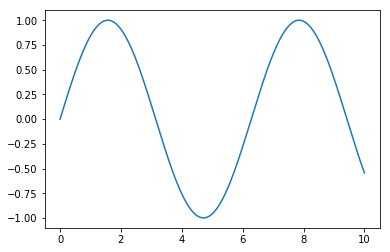

In [59]:
plt.plot(ts_data.x_data,ts_data.y_true)

In [60]:
# Num of steps in batch (also used for prediction steps into the future)
num_time_steps = 30

In [61]:
# Num of steps in batch (also used for prediction steps into the future)
y1,y2,ts=ts_data.next_batch(1,num_time_steps,True)

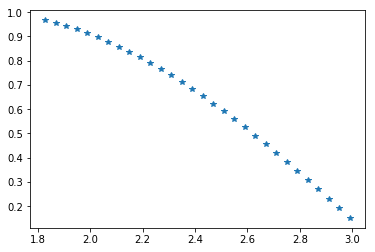

In [62]:
plt.plot(ts.flatten()[1:],y2.flatten(),'*')

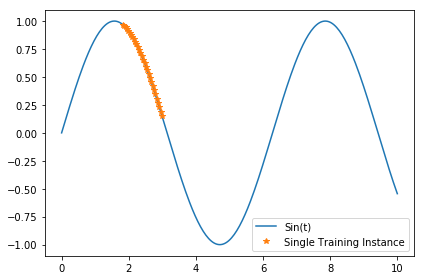

In [63]:
plt.plot(ts_data.x_data,ts_data.y_true,label='Sin(t)')
plt.plot(ts.flatten()[1:],y2.flatten(),'*',label='Single Training Instance')
plt.legend()
plt.tight_layout()

# Training Data 

In [64]:
train_inst = np.linspace(5,5 + ts_data.resolution * (num_time_steps + 1), num_time_steps+1)

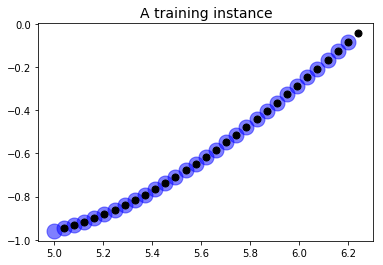

In [65]:
plt.title("A training instance", fontsize=14)
plt.plot(train_inst[:-1], ts_data.ret_true(train_inst[:-1]), "bo", markersize=15,alpha=0.5 ,label="instance")
plt.plot(train_inst[1:], ts_data.ret_true(train_inst[1:]), "ko", markersize=7, label="target")

# Creating the model

In [66]:
tf.reset_default_graph()

Constant 

In [67]:
# Just one feature, the time series
num_inputs = 1
# 100 neuron layer, play with this
num_neurons = 100
# Just one output, predicted time series
num_outputs = 1
# learning rate, 0.0001 default, but you can play with this
learning_rate = 0.0001
# how many iterations to go through (training steps), you can play with this
num_train_iterations = 2000
# Size of the batch of data
batch_size = 1

Placeholders

In [68]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

RNN cell layer 

In [69]:
#cell = tf.contrib.rnn.OutputProjectionWrapper(
   # tf.contrib.rnn.BasicRNNCell(num_units=num_neurons, activation=tf.nn.relu),
   # output_size=num_outputs)

In [70]:
 #cell = tf.contrib.rnn.OutputProjectionWrapper(
  #   tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
  #   output_size=num_outputs)

In [71]:
#n_neurons = 100
#n_layers = 3

# cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
 #       for layer in range(n_layers)])

IndentationError: unexpected indent (<ipython-input-71-e56a2661312f>, line 4)

In [72]:
# cell = tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu)

In [73]:
# n_neurons = 100
# n_layers = 3

# cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
#           for layer in range(n_layers)])

# Dynamic RNN

In [74]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

ValueError: Input graph and Layer graph are not the same: Tensor("rnn/while/TensorArrayReadV3:0", shape=(?, 1), dtype=float32) is not from the passed-in graph.

# Loss Function and Optimizer¶


In [75]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

ValueError: Tensor("Placeholder_1:0", shape=(?, 30, 1), dtype=float32) must be from the same graph as Tensor("rnn/transpose_1:0", shape=(?, 30, 1), dtype=float32).

Init Variables

In [76]:
init = tf.global_variables_initializer()

# Session

In [77]:
# ONLY FOR GPU USERS:
# https://stackoverflow.com/questions/34199233/how-to-prevent-tensorflow-from-allocating-the-totality-of-a-gpu-memory
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.75)

In [78]:
saver = tf.train.Saver()

ValueError: No variables to save

In [79]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = ts_data.next_batch(batch_size, num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./rnn_time_series_model")

ValueError: Fetch argument <tf.Operation 'Adam' type=NoOp> cannot be interpreted as a Tensor. (Operation name: "Adam"
op: "NoOp"
input: "^Adam/update_rnn/output_projection_wrapper/basic_lstm_cell/kernel/ApplyAdam"
input: "^Adam/update_rnn/output_projection_wrapper/basic_lstm_cell/bias/ApplyAdam"
input: "^Adam/update_rnn/output_projection_wrapper/kernel/ApplyAdam"
input: "^Adam/update_rnn/output_projection_wrapper/bias/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"
 is not an element of this graph.)

# Predicting a time series t+1

In [80]:
with tf.Session() as sess:                          
    saver.restore(sess, "./rnn_time_series_model")   

    X_new = np.sin(np.array(train_inst[:-1].reshape(-1, num_time_steps, num_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./rnn_time_series_model


TypeError: Cannot interpret feed_dict key as Tensor: The name 'save/Const:0' refers to a Tensor which does not exist. The operation, 'save/Const', does not exist in the graph.

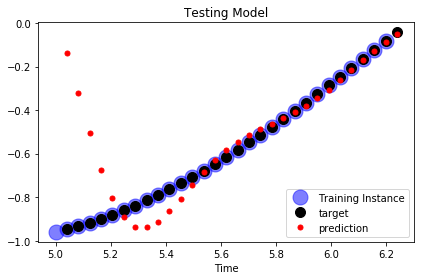

In [81]:
plt.title("Testing Model")

# Training Instance
plt.plot(train_inst[:-1], np.sin(train_inst[:-1]), "bo", markersize=15,alpha=0.5, label="Training Instance")

# Target to Predict
plt.plot(train_inst[1:], np.sin(train_inst[1:]), "ko", markersize=10, label="target")

# Models Prediction
plt.plot(train_inst[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")

plt.xlabel("Time")
plt.legend()
plt.tight_layout()